## Dimensionality Reduction: kaggle Social Network Ads Dataset
https://www.kaggle.com/rakeshrau/social-network-ads

** Dataset Information: **

400 users purchased/not purchased a particular product

** Attribute Information: (4 features and 1 class) **

- User ID
- Gender
- Age
- EstimatedSalary
- Purchased

** Objective of this project **

Predict whether users purchased or not based on two features (Age and Salary) with PCA & Kernel PCA applied

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# Inspect Data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df.shape

(400, 5)

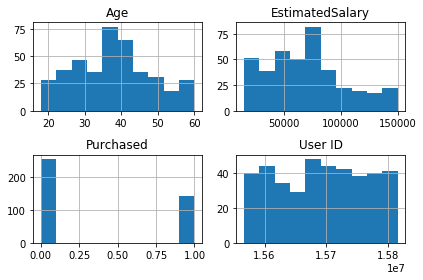

In [6]:
_ = df.hist()#figsize=(12,12))
plt.tight_layout()

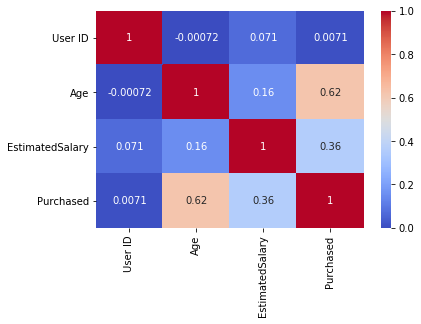

In [7]:
plt.figure()#figsize=(12,12))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

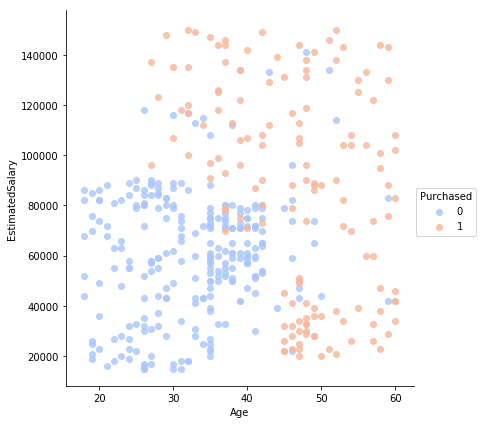

In [11]:
sns.lmplot('Age','EstimatedSalary',data=df, hue='Purchased',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [12]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

## Data preprocessing

** Split Features & Class (or target) **

In [31]:
X = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values
print(X.shape,y.shape)

(400, 2) (400,)


** Split Train Test Sets **

In [24]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


In [33]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([206, 114], dtype=int64))

** Scale features **

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Baseline Model

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Original features:')
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
accuracy = model.score(X_test, y_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy*100))

Original features:
Accuracy of train set: 84.7%
Accuracy of test set: 80.0%


# 1. Principal Component Analysis (PCA)

PCA-applied features (PC1 & PC2):
Accuracy of train set: 84.7%
Accuracy of test set: 80.0%


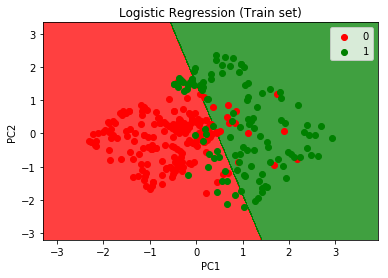

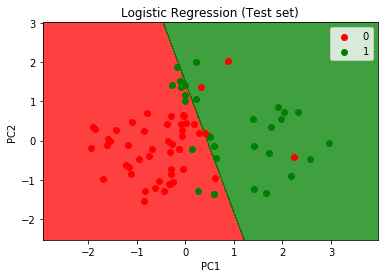

In [36]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Train the  model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=seed)
model.fit(X_train_pca, y_train)

# Evaluate the model
accuracy = model.score(X_train_pca, y_train)
print('PCA-applied features (PC1 & PC2):')
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
accuracy = model.score(X_test_pca, y_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy*100))

# Visualize the results
#Train set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#Test set
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# 2. Kernel PCA

Kernel PCA-applied features (KPC1 & KPC2):
Accuracy of train set: 88.1%
Accuracy of test set: 85.0%


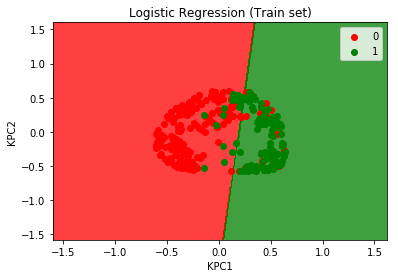

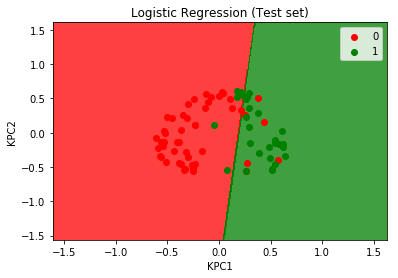

In [37]:
# Apply Keranl PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Train the  model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=seed)
model.fit(X_train_kpca, y_train)

# Evaluate the model
accuracy = model.score(X_train_kpca, y_train)
print('Kernel PCA-applied features (KPC1 & KPC2):')
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
accuracy = model.score(X_test_kpca, y_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy*100))

# Visualize the results
#Train set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_kpca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()

#Test set
X_set, y_set = X_test_kpca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()